In [2]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import single_session_plots as ssp
import numpy as np
import scipy as sp
import sklearn as sk
from matplotlib import pyplot as plt
from LatentVarFuncs import *
import pickle
import scipy as sp
%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# import behavioral sessions
mouse = '4139190.1'
df = u.load_session_db()
#ca1mice = ['4139190.1','4139190.3', '4054011.1','4139202.2']
#dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
150,4139190.1,16_06_2018,2,TwoTower_Timeout,19,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
177,4139190.1,21_06_2018,2,TwoTower_Timeout,20,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
160,4139190.1,28_06_2018,8,TwoTower_Timeout,22,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
164,4139190.1,28_06_2018,2,TwoTower_Timeout,17,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
165,4139190.1,28_06_2018,9,TwoTower_Timeout,18,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...


In [4]:
# pick candidate session
sess = df_mouse.iloc[4]
sess

MouseName                                                4139190.1
DateFolder                                              24_06_2018
SessionNumber                                                    2
Track                                             TwoTower_Timeout
RewardCount                                                    104
Imaging                                                          1
DateTime                                       2018-06-24 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
Name: 169, dtype: object

In [5]:
behav = u.behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)
info = u.loadmat_sbx(sess['scanmat'])['info']
ca_dat = u.load_ca_mat(sess['scanfile'])
C = ca_dat['C_keep'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = behav.shape[0]-C.shape[0]
if frame_diff>0:
    behav = behav.iloc[:-frame_diff]
    
C_z = sp.stats.zscore(C,axis=0)

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


In [6]:
#  set up encoding models
dmat = pos_morph_design_matrix(behav['pos']._values,behav['morph']._values)
train_inds = ((behav['morph']==1) | (behav['morph']==0)) & (behav['pos']>0)
dmat_extreme = dmat[train_inds,:]
C_extreme = C_z[train_inds,:]

glm_base = sk.linear_model.LinearRegression()

# for cells in session
glm_base.fit(dmat_extreme,C_extreme)
mu_extreme_hat = glm_base.predict(dmat_extreme)


# restrict analysis to cells for which the encoding model was reasonable
r2 = []
for cell in range(C_z.shape[1]):
    glm_tmp = sk.linear_model.LinearRegression()
    glm_tmp.fit(dmat_extreme,C_extreme[:,cell])
    mu_extreme_hat = glm_tmp.predict(dmat_extreme)
    r2.append(glm_tmp.score(dmat_extreme,C_extreme[:,cell]))
r2 = np.array(r2)
r2mask = r2>.05 # arbitrary based on histogram of r2 values
glm_final = sk.linear_model.LinearRegression()
glm_final.fit(dmat_extreme,C_extreme[:,r2mask])

# find position transition probabilities
morph0inds = behav['morph']==0
XX_I0, xbins = transition_prob_matrix(behav['pos']._values[morph0inds],binsize=5)

morph1inds = behav['morph']==1
XX_I1, xbins = transition_prob_matrix(behav['pos']._values[morph1inds],binsize=5)
xbins = np.array(xbins)

pos_binned = np.digitize(behav['pos']._values,xbins,right=True)



# get trial by trial info
tstarts,tstops = np.where(behav['tstart']==1)[0],np.where(behav['teleport']==1)[0]
trial_pos, trial_C_z  = [], []
for (start,stop) in zip(tstarts,tstops):
    trial_pos.append(behav['pos']._values[start:stop])
    trial_C_z.append(C_z[start:stop,r2mask]) # restrict to well fit cells
d = u.by_trial_info(behav)

# get data for estimating all likelihoods
mu_i0 = glm_final.predict(pos_morph_design_matrix(xbins,np.zeros([xbins.shape[0],])))
mu_i1 = glm_final.predict(pos_morph_design_matrix(xbins,np.ones([xbins.shape[0],])))



C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:479: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


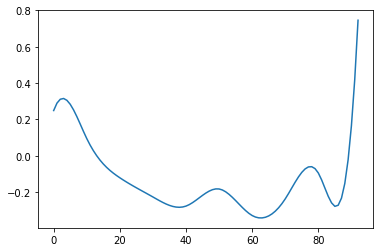

In [8]:
f,ax = plt.subplots()
ax.plot(mu_i1[:,430])

In [60]:
# loop through alpha and beta
alpha = np.linspace(.5,1,5)
beta = np.linspace(.5,1,5)


for a in alpha.tolist():
    for b in beta.tolist():
        print(a,b)
        # do decoding for single cells and population
       # decod_dict = decoding_model(trial_C_z,XX_I0,XX_I1,mu_i0,mu_i1,a,b,d['morphs'])
       # for key in decod_dict.keys():
       #     fname = "G:\\My Drive\\MCN\\project\\ParamSweep\\%s_alpha%f_beta%f.p" % (key, a,b)
       #     with open(fname,"wb") as f:
       #         pickle.dump({'val':decod_dict[key]},f)
            
        
        # calculate likelihoods from single cells
        #if a == .5 and b ==.5:
        II = np.array([[a, 1-a],[1-b,b]]) # morph transition probability
        LL = {}
        for cell in range(trial_C_z[0].shape[1]):
            # for each trial
            LL[cell]=[]
            for trial,CZ in enumerate(trial_C_z):
                # get activity and expected mean
                cz = CZ[:,cell]
                C0 = np.matlib.repmat(cz[np.newaxis].T,1,mu_i0.shape[0]).T
                MUI0 = np.matlib.repmat(mu_i0[:,cell][np.newaxis].T,1,cz.shape[0])

                C1 = np.matlib.repmat(cz[np.newaxis].T,1,mu_i1.shape[0]).T
                MUI1 = np.matlib.repmat(mu_i0[:,cell][np.newaxis].T,1,cz.shape[0])

                # get likelihood at each data point for any given position and context(NxT)
                L_I0 = gaussian_pdf(C0,MUI0,1)
                L_I1 = gaussian_pdf(C1,MUI1,1)

                # log likelihood of observing data given parameters
                LLY = np.log(forward_procedure_single_cell(XX_I0,XX_I1,L_I0,L_I1,II))
                if np.isinf(LLY):
                    LLY = -1e10
                LL[cell].append(LLY)



            # save results
            fname = "G:\\My Drive\\MCN\\project\\ParamSweep\\LL_alpha%f_beta%f.p" % (a,b)
            #results = {'decode':decod_dict,'LogLikelihood':LL}
            with open(fname,'wb') as f:
                pickle.dump(LL,f)


        
            
        
        

0.5 0.5


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


0.5 0.625
0.5 0.75
0.5 0.875
0.5 1.0
0.625 0.5
0.625 0.625
0.625 0.75
0.625 0.875
0.625 1.0
0.75 0.5
0.75 0.625
0.75 0.75
0.75 0.875
0.75 1.0
0.875 0.5
0.875 0.625
0.875 0.75
0.875 0.875
0.875 1.0
1.0 0.5
1.0 0.625
1.0 0.75
1.0 0.875
1.0 1.0


In [55]:
#np.save(fname,decod_dict[key])

MemoryError: 

In [41]:
print(decod_dict.keys())

dict_keys(['i0x_y', 'i1x_y', 'i0', 'i1', 'pop i0x_y', 'pop i1x_y', 'pop i0', 'pop i1'])


In [44]:
for key in decod_dict.keys():
    fname = "G:\\My Drive\\MCN\\project\\ParamSweep\\%s_alpha%f_beta%f.p" % (key, a,b)
    with open(fname,"wb") as f:
        pickle.dump({'val':decod_dict[key]},f)

In [45]:
import sqlite3
db = sqlite3.connect('file.sqlite')
cur = db.execute('CREATE TABLE keyvals (key TEXT PRIMARY KEY, value BLOB)')
db.commit()
cur.executemany('INSERT INTO keyvals VALUES (?, ?)' , decod_dict.items())

InterfaceError: Error binding parameter 1 - probably unsupported type.